## xcengine example input: ESA CCI Open Data Portal access using xcube

This notebook was adapted from an example in the [xcube-cci repository](https://github.com/xcube-dev/xcube-cci).
It shows how to open data cubes from the ESA CCI Open Data Portal for a given time range and region.

To run this Notebook, make sure the ESA CCI ODP / xcube Integration is setup correctly (see [Ex0-DCFS-Setup](./Ex0-DCFS-Setup.ipynb)).
To get more information about the datasets provided by the store, see [Ex1a-DCFS-CCI_access](./Ex1a-DCFS-CCI_access.ipynb). 
We start with necessary imports.

In [1]:
from xcube_cci.dataaccess import CciOdpDataStore
import IPython.display
import shapely

<frozen abc>:106: FutureWarning: xarray subclass VectorDataCube should explicitly define __slots__


Now we can create the store.

In [2]:
cci_store = CciOdpDataStore(normalize_data=True)

For this demo, we are using the dataset with the id `esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1`. Here are its metadata:

Define a bounding box containing Africa.

In [3]:
bbox = (-23.40, -40.40, 57.40, 40.40)

Check the dataset's open parameter schema to make sure that our parameters are valid.

In [4]:
cci_store.get_open_data_params_schema(
    data_id="esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1",
    opener_id="dataset:zarr:cciodp",
)

Select any valid combination from the paramater in *properties* above. The only mandatory parameter is the data_id. If you leave any parameter out, all available values will be considered.

Fetch and show the dataset.

In [5]:
cube = cci_store.open_data(
    "esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1",
    variable_names=["absorbing_aerosol_index"],
    bbox=bbox,
    time_range=["2005-01-01", "2005-12-31"],
    opener_id="dataset:zarr:cciodp",
)
cube

<xarray.Dataset> Size: 308kB
Dimensions:                  (time: 12, lat: 80, lon: 80, bnds: 2)
Coordinates:
  * lat                      (lat) float32 320B -39.5 -38.5 -37.5 ... 38.5 39.5
  * lon                      (lon) float32 320B -22.5 -21.5 -20.5 ... 55.5 56.5
  * time                     (time) datetime64[ns] 96B 2005-01-16T12:00:00 .....
    time_bnds                (time, bnds) datetime64[ns] 192B dask.array<chunksize=(12, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    absorbing_aerosol_index  (time, lat, lon) float32 307kB dask.array<chunksize=(1, 80, 80), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-pla...
    date_created:            2024-11-19T18:22:31.056684
    processing_level:        L3
    time_coverage_start:     2005-01-01T00:00:00
    time_coverage_end:       2006-01-01T00:00:00
    time_coverage_duration:  P365DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

We can visualize the cube's time coordinates:

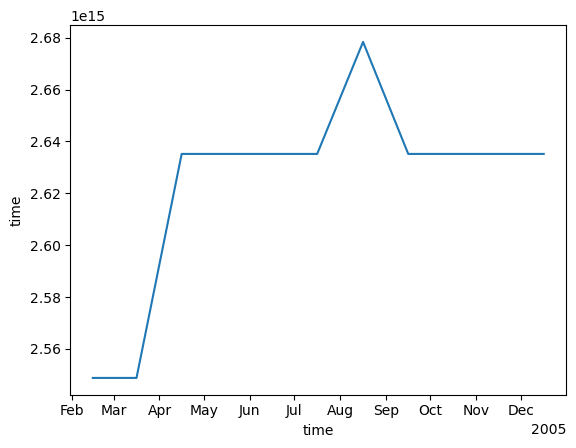

In [6]:
cube.time.diff(dim="time").plot.line()

And finally, display the results:

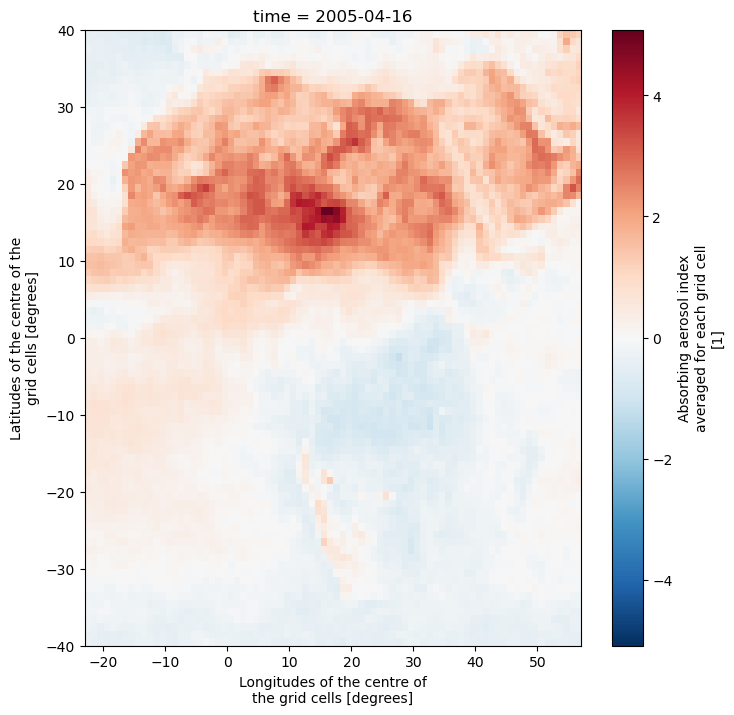

In [7]:
cube.absorbing_aerosol_index.sel(
    time="2005-04-15 12:00:00", method="nearest"
).plot.imshow(figsize=(8, 8))